# 파이썬 데이터 분석

-----

# 2.1) 나무위키 최신 변경 문서의 키워드 분석

### 바로가기

- [<Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기](#<Step1.-크롤링>-:-크롤링으로-웹-데이터-가져오기)
    - [BeautifulSoup을 이용한 웹 크롤링]
    - [나무위키 최근변경 데이터 크롤링]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [말뭉치 만들기]
    - [konlpy를 이용한 키워드 추출]
    - [키워드 가다듬기]
- [<Step3. 시각화> : 워드 클라우드 시각화](#<Step3.-시각화>-:-워드-클라우드-시각화)
    - [pytagcloud 사용하기]
    - [나무위키 키워드 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

### [BeautifulSoup을 이용한 웹 크롤링]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install requests`
    - (env_name) `pip install beautifulsoup4`
    - (env_name) `pip install lxml`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [13]:
!pip install requests beautifulsoup4 lxml

-----

##### 페이지 리스트 가져오기

In [2]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [3]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EB%B7%B0%ED%8B%B0%ED%92%80%20%EA%B5%B0%EB%B0%94%EB%A6%AC/%ED%91%9C%EC%A7%80/200%ED%99%94~299%ED%99%94
https://namu.wiki/w/%EA%B8%B0%EA%B5%90(%EC%9C%A0%ED%9D%AC%EC%99%95)
https://namu.wiki/w/%EC%B6%A9%EB%AC%B4%EA%B3%B5%EB%8F%99
https://namu.wiki/w/%ED%95%9C%EA%B5%AD-%EA%B7%B8%EB%A6%AC%EC%8A%A4%20%EA%B4%80%EA%B3%84
https://namu.wiki/w/%EC%82%AC%EA%B8%B0%EA%BE%BC/%EB%AA%A9%EB%A1%9D


-----

##### 페이지내 텍스트 구조 확인

In [4]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

뷰티풀 군바리/표지/200화~299화 


뷰티풀 군바리


   상위 문서: 뷰티풀 군바리/표지등장인물 (본부·1·2·3·기타) | 표지 (0·1·2) 설정 | 고증오류 및 실수 | 논란 | 평가1. 개요1.1. 200화1.2. 201화1.3. 202화1.4. 203화1.5. 204화1.6. 205화1.7. 206화1.8. 207화1.9. 208화1.10. 209화2. 210화대2.1. 210화2.2. 211화2.3. 212화2.4. 213화2.5. 214화2.6. 215화2.7. 216화2.8. 217화2.9. 218화2.10. 219화3. 220화대3.1. 220화3.2. 221화3.3. 221화3.4. 222화3.5. 223화3.6. 224화3.7. 225화3.8. 226화3.9. 227화3.10. 228화3.11. 229화4. 230화대4.1. 231화4.2. 232화4.3. 233화4.4. 234화4.5. 235화4.6. 236화4.7. 237화4.8. 238화4.9. 3부 프롤로그4.10. 239화5. 240화대5.1. 240화5.2. 241화5.3. 242화5.4. 243화5.5. 244화5.6. 245화5.7. 246화5.8. 247화5.9. 248화5.10. 249화6. 250화대6.1. 250화6.2. 251화6.3. 252화네이버 웹툰 뷰티풀 군바리의 표지를 모아둔 문서. 200화에서 299화까지의 표지를 수록하고 있다. 문서가 완성되면 3부 프롤로그를 포함하여 수록한다.200화 - 웃는 얼굴인 한겨울.파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg남자 버전으로 그려진 민지선아직도 이별의 충격에서 벗어나지 못한 봄이.208화가 스토어 기준 만우절 업로드라 만우절 기념 가벼운 낚시 에피소드가 있어서 표지가 2개다.파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파일:.jpg파

-----

### [나무위키 최근변경 데이터 크롤링]

In [5]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [6]:
df.head(5)

,title,category,content_text
0,뷰티풀 군바리/표지/200화~299화,뷰티풀 군바리,상위 문서: 뷰티풀 군바리/표지등장인물 (본부·1·2·3·기타) | 표지 (0...
1,기교(유희왕),유희왕/OCG/기계족유희왕/OCG/시리즈 카드,1. 개요2. 메인 덱 몬스터2.1. 기교사-오로치트론2.2. 기교취-야타노미사키2...
2,충무공동,경상남도의 동진주시의 행정구역,경상남도 진주시 행정구역 경상남도 진주시 행정구역 [ 펼치기 · 접기 ]읍문산읍면...
3,한국-그리스 관계,대한민국의 대국관계그리스의 대국관계대국관계,대한민국의 대외관계 [ 펼치기 · 접기 ]6자회담 당사국북한미국일본러시아중국아시아...
4,사기꾼/목록,인물 목록캐릭터 목록범죄자,상위 문서: 사기꾼 로그인 후 편집 가능한 문서입니다.1. 실존인물2. 가...


-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [7]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
print(text_cleaning(df['content_text'][0]))

  상위 문서 뷰티풀 군바리표지등장인물 본부기타  표지  설정  고증오류 및 실수  논란  평가 개요 화 화 화 화 화 화 화 화 화 화 화대 화 화 화 화 화 화 화 화 화 화 화대 화 화 화 화 화 화 화 화 화 화 화 화대 화 화 화 화 화 화 화 화 부 프롤로그 화 화대 화 화 화 화 화 화 화 화 화 화 화대 화 화 화네이버 웹툰 뷰티풀 군바리의 표지를 모아둔 문서 화에서 화까지의 표지를 수록하고 있다 문서가 완성되면 부 프롤로그를 포함하여 수록한다화  웃는 얼굴인 한겨울파일파일파일파일파일남자 버전으로 그려진 민지선아직도 이별의 충격에서 벗어나지 못한 봄이화가 스토어 기준 만우절 업로드라 만우절 기념 가벼운 낚시 에피소드가 있어서 표지가 개다파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일파일부 프롤로그  상경 활동복 차림인 정수아소대 신병 한유진열외된 수경 한소이상경이 된 최아랑타중대에서 날라온 소대 전출자  조예령챙 막내 이보현소대 챙짱이자 우지영 조미주의 동기 장채원현봄이상경 활동복을 입은 주희린상경 활동복을 입고 있는 고효원여름용 기동복을 입고 있는 우지영서다미방패를 들고 시위를 진압하러 가는 정수아상경 활동복을 입고 있는 김세이 이 문서의 내용 중 전체 또는 일부는 뷰티풀 군바리표지 문서의  판 번 문단에서 가져왔습니다 이전 역사 보러 가기 이 문서의 내용 중 전체 또는 일부는 다른 문서에서 가져왔습니다  펼치기  접기 뷰티풀 군바리표지 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사 문서의  판 번 문단 이전 역사


In [9]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,뷰티풀 군바리표지화화,뷰티풀 군바리,상위 문서 뷰티풀 군바리표지등장인물 본부기타 표지 설정 고증오류 및 실수 ...
1,기교유희왕,유희왕기계족유희왕시리즈 카드,개요 메인 덱 몬스터 기교사오로치트론 기교취야타노미사키 기교제아메노카구노미카즈치 ...
2,충무공동,경상남도의 동진주시의 행정구역,경상남도 진주시 행정구역 경상남도 진주시 행정구역 펼치기 접기 읍문산읍면금곡면...
3,한국그리스 관계,대한민국의 대국관계그리스의 대국관계대국관계,대한민국의 대외관계 펼치기 접기 자회담 당사국북한미국일본러시아중국아시아대만몽골...
4,사기꾼목록,인물 목록캐릭터 목록범죄자,상위 문서 사기꾼 로그인 후 편집 가능한 문서입니다 실존인물 가상인물실제로 사...


-----

### [말뭉치 만들기]

In [10]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

뷰티풀 군바리표지화화 기교유희왕 충무공동 한국그리스 관계 사기꾼목록 테이스티 사가  나하공항역 제브라토리코 대구광역시 네이버 웹툰기업 와타나베 아카리 레드포켓몬스터 명사냥꾼 크린 한국타지키스탄 관계 강다니엘 스트라이크 프리덤 건담 야구방망이 동남 방언상대 높임법 오무라이스 잼잼 알 파치노  의정부고등학교 페스트영원한 일의 도시 액슬 로즈  파일화 현봄이 표지 년대 박세영쇼트트랙 키움 히어로즈년월 스타크래프트  공허의 유산협동전 임무천상의 쟁탈전 초딩 분류베리드 스타즈 진주시 레전드 오브 룬테라녹서스 경주 감산사 석조미륵보살입상 공동주택목록고양시 빅토르 안 삼산동인천 최배영 도레미 마켓방영 목록 대마왕마법천자문 대한민국출산율 한국오스트리아 관계 오키나와 도시 모노레일선 채두 스티븐 쿼츠 유니버스 길막 인서전시 샌드스톰병과 틀가면라이더 목록위자드 비즈니스 이메일 영어표현정리 데몬어벤져스킬 라스트오리진평가 제주성 위협사건 던전 크롤마법 경녀 안양시  네이버 웹툰기업  학익역 퍼시픽 림  우리은행    주차 공동주택목록안산시 포천 버스  네일배트 하키가수 열혈바보 한지우 평양정보기술국   등장인물티페리트 셀피리스 베리드 스타즈 한국방글라데시 관계     히나사메 룩셈부르크 규범주의와 기술주의 쇼어라인타르코프 공동주택목록과천시 


-----

### [konlpy를 이용한 키워드 추출]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
- 아래의 방법으로 설치해도 실행되지 않는다면, http://konlpy.org/ko/latest/install/ 를 참고하세요.
    - Install
        - 1. Java를 설치합니다. (https://java.com/ko/download/)
        - 2. c++ 컴파일러를 설치합니다. 
            - 윈도우 : `Microsoft Visual C++ 14.0` 설치 권장, https://visualstudio.microsoft.com/ko/downloads/
            - Mac OS : `Xcode` 설치 권장
            - Linux : `gcc` 설치 권장
        - 3. 아래와 같은 파이썬 패키지를 설치합니다.
            - (env_name) `pip install konlpy`
            - (env_name) `pip install jpype1`
            - (env_name) `pip install Jpype1-py3`

In [12]:
# !pip install konlpy

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1


In [15]:
!pip install jpype1

In [16]:
!pip install Jpype1-py3

  Using cached JPype1-py3-0.5.5.4.tar.gz (88 kB)
  Created wheel for Jpype1-py3: filename=JPype1_py3-0.5.5.4-cp38-cp38-win_amd64.whl size=193131 sha256=f6f2f8917fada948f1209d482a947124f2b7583f682502cbe1c5bd944eb7173a
  Stored in directory: c:\users\w\appdata\local\pip\cache\wheels\e2\62\cb\64ba4955005a2d19364d9162893985494be2cbfe6130dcbba4
Successfully built Jpype1-py3


In [11]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [12]:
count

Counter({'상위': 58,
         '문서': 392,
         '뷰티풀': 5,
         '군': 36,
         '바리': 7,
         '표지': 12,
         '등장인물': 24,
         '본부': 18,
         '기타': 72,
         '설정': 174,
         '고증': 7,
         '오류': 30,
         '및': 301,
         '실수': 38,
         '논란': 58,
         '평가': 145,
         '개요': 67,
         '화': 375,
         '화대': 5,
         '부': 98,
         '프롤로그': 5,
         '네이버': 91,
         '웹툰': 84,
         '수록': 54,
         '완성': 38,
         '포함': 138,
         '다화': 79,
         '얼굴': 70,
         '한겨울': 2,
         '파일': 56,
         '남자': 104,
         '버전': 193,
         '민': 14,
         '지선': 5,
         '이별': 7,
         '충격': 51,
         '못': 320,
         '봄': 20,
         '화가': 29,
         '스토어': 10,
         '기준': 161,
         '만우절': 3,
         '업로드': 11,
         '기념': 22,
         '낚시': 9,
         '에피소드': 48,
         '상경': 5,
         '활동': 147,
         '복': 43,
         '차림': 7,
         '정수': 6,
         '소대': 4,
         '신

-----

### [키워드 가다듬기]

##### 한글자 키워드 제거

In [13]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'때문': 1116, '공격': 944, '사용': 891, '세대': 855, '경우': 810, '게임': 640, '정도': 632, '레벨': 616, '주문': 603, '사람': 561, '이후': 558, '스티븐': 542, '다른': 522, '한국': 493, '마법': 479, '시간': 471, '지역': 468, '효과': 465, '자신': 464, '시작': 437, '최대': 428, '이전': 425, '상태': 421, '하나': 416, '또한': 406, '문제': 405, '모습': 399, '문단': 395, '부분': 393, '문서': 392, '년대': 380, '소환': 379, '대한': 374, '사실': 374, '단지': 372, '방어': 372, '위해': 369, '다시': 361, '내용': 360, '시즌': 345, '캐릭터': 343, '피해': 341, '모든': 337, '이름': 336, '상대': 333, '포켓몬': 333, '이상': 332, '경기': 322, '상황': 315, '모두': 309, '스킬': 309, '등장': 297, '가장': 296, '기술': 293, '현재': 289, '사항': 288, '매우': 288, '카드': 285, '레드': 281, '생각': 279, '대구': 278, '시전': 269, '다니엘': 266, '다만': 265, '증가': 265, '역사': 262, '체력': 262, '영화': 262, '매트릭스': 261, '능력': 257, '다년': 257, '추가': 256, '소음': 256, '대미지': 245, '로봇': 243, '초반': 238, '시리즈': 235, '파괴': 229, '동안': 228, '다음': 227, '해당': 226, '당시': 224, '성공': 223, '자체': 222, '가지': 222, '몬스터': 221, '합의': 217, '편이': 216, '일본': 215, '참

-----

##### 불용어 제거

In [14]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [15]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [16]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'공격': 944, '세대': 855, '게임': 640, '레벨': 616, '주문': 603, '사람': 561, '스티븐': 542, '한국': 493, '마법': 479, '지역': 468, '효과': 465, '시작': 437, '최대': 428, '이전': 425, '상태': 421, '문제': 405, '문단': 395, '부분': 393, '년대': 380, '소환': 379, '대한': 374, '방어': 372, '위해': 369, '다시': 361, '시즌': 345, '캐릭터': 343, '피해': 341, '상대': 333, '포켓몬': 333, '경기': 322, '스킬': 309, '등장': 297, '기술': 293, '현재': 289, '사항': 288, '카드': 285, '레드': 281, '대구': 278, '시전': 269, '다니엘': 266, '증가': 265, '역사': 262, '체력': 262, '영화': 262, '매트릭스': 261, '능력': 257, '다년': 257, '소음': 256, '대미지': 245, '로봇': 243, '초반': 238, '시리즈': 235, '파괴': 229, '당시': 224, '성공': 223, '자체': 222, '가지': 222, '몬스터': 221, '합의': 217, '편이': 216, '일본': 215, '참고': 213, '고등학교': 213, '존재': 212, '제외': 212, '진주': 212, '토론': 212, '대부분': 211, '선수': 209, '아군': 208, '유저': 207, '관련': 206, '대해': 206, '학파': 206, '감소': 203, '지우': 199, '전체': 197, '수도': 197, '라인': 197, '일반': 196, '캐치': 196, '전투': 194, '조합': 194, '배트': 194, '버전': 193, '처음': 190, '이기': 190, '계속': 188, '실제': 187, 

-----

# <Step3. 시각화> : 워드 클라우드 시각화

### [pytagcloud 사용하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install pytagcloud pygame simplejson`
- 그리고 아래와 같은 경로에 한글 폰트(예: NanumBarunGothic.ttf) 파일을 옮깁니다. 
    - Mac OS : /{anaconda_path}/envs/{env_name}/lib/python3.7/site-packages/pytagcloud/fonts
    - Windosw OS : \{anaconda_path}\envs\{env_name}\Lib\site-packages\pytagcloud\fonts
    - `폰트 다운로드 : http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf`
- 파일을 옮긴 후, 파이썬 가상환경을 재실행 하여 주피터를 다시 실행해줍니다. 그래도 아래의 코드가 실행되지 않는 경우는 다음과 같은 작업을 수행합니다.
    - 위의 경로에서 font.json 파일을 편집합니다.
    - 아래와 같은 코드를 추가하고 font.json 파일을 저장합니다.
    - {
                "name": "NanumGothic",
                "ttf": "NanumGothic.ttf",
                "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
        },

In [26]:
!pip install pytagcloud pygame simplejson

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759873 sha256=28e4459404811361f6256bc4ea7928a5e62877b4abd692f9ef89aca84819822f
  Stored in directory: c:\users\w\appdata\local\pip\cache\wheels\be\9b\7d\911eafd2b3a1ab76aafb0d5929e7aede8db74f5436af7a2b9e
  Created wheel for simplejson: filename=simplejson-3.17.2-cp38-cp38-win_amd64.whl size=74470 sha256=132470cae0033c948df67490bfdac40e788648ca51e8c27823011a31a5af3ae8
  Stored in directory: c:\users\w\appdata\local\pip\cache\wheels\17\72\7d\df0984c925921e22322ea462a6f861e9d0617881192deb9b8d
Successfully built pytagcloud simplejson


In [18]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='malgun', rectangular=False)

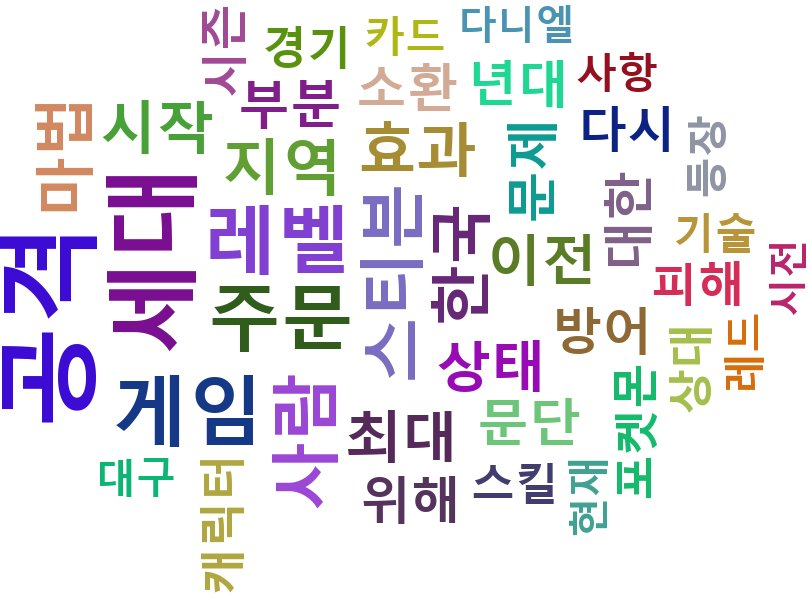

In [19]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')

-----

### [나무위키 키워드 시각화]

##### 제목 키워드

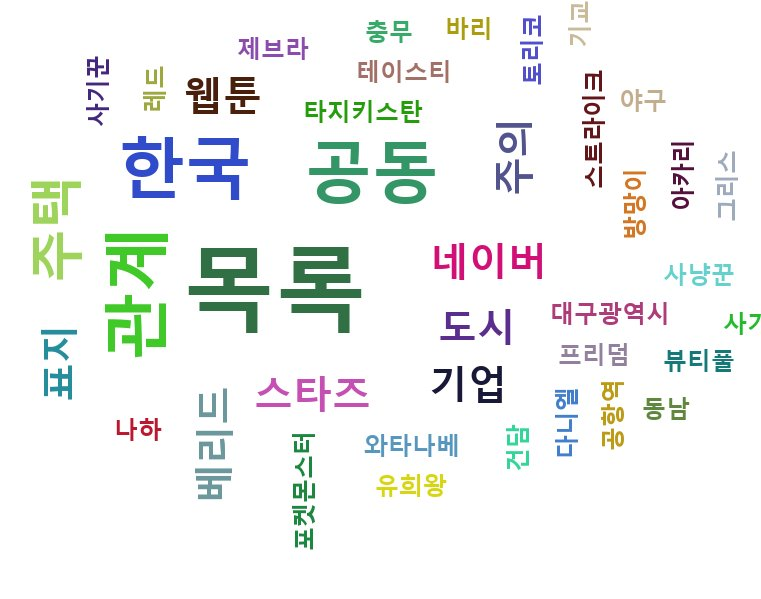

In [21]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='malgun', rectangular=False)

Image(filename='title_wordcloud.jpg')

-----

##### 카테고리 키워드

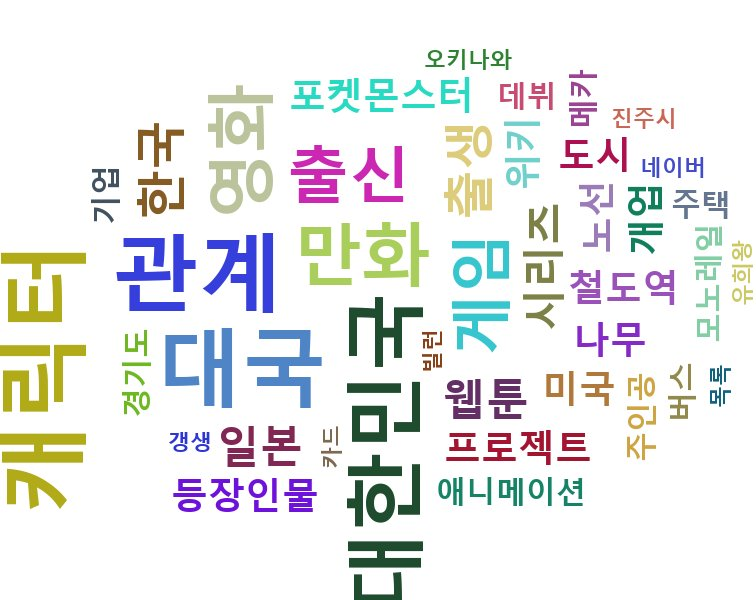

In [22]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='malgun', rectangular=False)

Image(filename='category_wordcloud.jpg')